# EL desafio del cubano: "Mantener una alimentacion saludable":  

## Introduccion


Una [alimentacion saludable](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) ayuda a protegernos de la malnutrición en todas sus formas, así como de las enfermedades no transmisibles, entre ellas la diabetes, las cardiopatías, los accidentes cerebrovasculares y el cáncer.
Para una alimentacion saludable se basa en consumir los nutrientes que necesita el cuerpo. La composición exacta varía según las características individuales de cada persona (edad, sexo, estilo de vida y grado de actividad física). Sin embargo, los principios básicos de una alimentación saludable siguen siendo los mismos para todos.



Los [macronutrientes](https://www.fundacionparalasalud.org/infantil/202/macronutrientes) son aquellas sustancias necesarias en grandes cantidades (proteina, grasas y carbohidrato) que proporcionan energía al organismo para un buen funcionamiento, para reparar y construir estructuras orgánicas y para promover el crecimiento. Los [micronutrientes](https://www.paho.org/es/temas/micronutrientes) son pequeñas cantidades de vitaminas y minerales requeridos por el cuerpo para la mayoría de las funciones celulares.

Tipos de nutrientes
1) Macronutrientes
2) Micronutrientes

En este proyecto se analizará de forma detallada el costo económico de los alimentos de consumo frecuente que se venden en las Mipymes de Cuba, con el objetivo de entender cómo sus precios afectan la alimentación cotidiana de la población.



In [1]:
import importlib 
import json
import src.gráficos as gr
import src.funciones as fn

mipyme = fn.cargar_json("data/mipymes.json")
nutrientes = fn.cargar_json("data/valor_nutricional.json")
evolución_precios = fn.cargar_json("data/evolucion_precios.json")
productos = ['muslo de pollo', 'pechuga de pollo', 'higado de pollo', 'picadillo de pollo', 'huevo', 'molleja de pollo', 'lomo de cerdo', 'atún', 'pierna de cerdo', 'solmillo de cerdo', 'garbanzos', 'frijoles negros', 'frijoles colorados', 'leche de vaca', 'arroz', 'codito', 'espaguetis']

proteina = []
grasas = []
carbohidratos = []

for producto in nutrientes:
    proteina.append(nutrientes[producto]["proteina"])
    grasas.append(nutrientes[producto]["grasas"])       
    carbohidratos.append(nutrientes[producto]["carbohidratos"])



En este análisis se examinan 17 alimentos de consumo frecuente disponibles en las Mipymes cubanas, incluyendo productos de origen animal y de origen vegetal, que pertenecen a los grupos de alimentos que la [OMS](https://www.who.int/es/news-room/fact-sheets/detail/healthy-diet) reconoce como necesarios para una alimentacion saludable con el propósito de evaluar la relación costo-beneficio nutricional de cada producto.

In [2]:
lista = []
for i in nutrientes:
    print(i)
    
    lista.append(i)
print()
print(f"Total de productos:>>>",len(lista))
   


muslo de pollo
pechuga de pollo
higado de pollo
picadillo de pollo
huevo
molleja de pollo
lomo de cerdo
atún
pierna de cerdo
solmillo de cerdo
garbanzos
frijoles negros
frijoles colorados
leche de vaca
arroz
codito
espaguetis

Total de productos:>>> 17


El Siguiente grafico muestra el precio promedio que una persona debe gastar en comprar 1 libra de los producto. Pero el peso escurrido de las diferentes latas de atún de todas las mipymes nunca llega a 1 libra, por eso el análisis se basa en el precio promedio para comprar 1 lata. En el caso de la leche, todos los envases son en una caja que contiene 1 litro de leche aproximadamente de 1030g que son aproximadamente 2,27 libras (1034/453.592). Por tanto el resultado de la funcion de la leche es el promedio de costo de un envace de 1 litro de leche. El resultado del de huevo es el promedio del valor de una unidad.


{'huevo': 104, 'espaguetis': 330, 'arroz': 341, 'codito': 373, 'higado de pollo': 432, 'picadillo de pollo': 494, 'molleja de pollo': 510, 'atún': 577, 'frijoles negros': 596, 'garbanzos': 609, 'frijoles colorados': 673, 'muslo de pollo': 674, 'pierna de cerdo': 1005, 'leche de vaca': 1198, 'lomo de cerdo': 1222, 'pechuga de pollo': 1231, 'solmillo de cerdo': 1579}


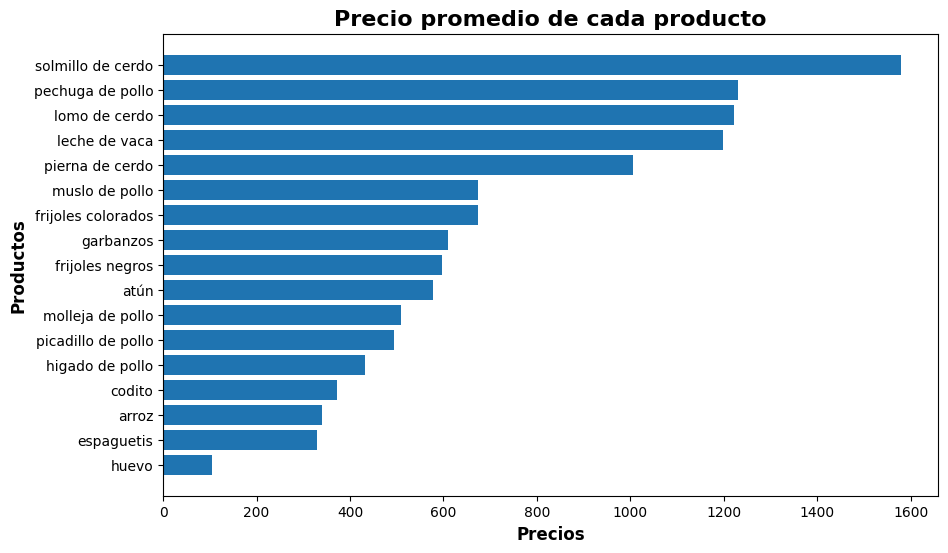

In [3]:
precio = fn.precio_promedio_lb(productos,mipyme)

claves_ordenados = sorted(precio, key=precio.get)
valores_ordenados = [round(precio[i]) for i in claves_ordenados]

diccionario = dict(zip(claves_ordenados, valores_ordenados))
print(diccionario)

gr.barra_costo_promedio(claves_ordenados,valores_ordenados)

### Requisitos para una dieta saludable

Consumir las proporciones correctas de macronutrientes diarios es clave para una alimentación saludable, a continuación se presentará un gráfico de pastel que muestra visualmente qué porcentaje aproximado de la energía diaria, entendida como el total de kilocalorías consumidas en el día, debería provenir de carbohidratos, grasas y proteínas en la dieta de un adulto. Esta proporción es una adaptación al contexto cubano de los conceptos sobre macronutrientes por [OMS/FON](https://iris.who.int/server/api/core/bitstreams/f06e1673-3689-4cb1-8a37-762a3e9c5360/content) distrubuyendo dentro del rango más cantidad de carbohidratos que de grasas y proteina porque son los carbohidratos más baratos.



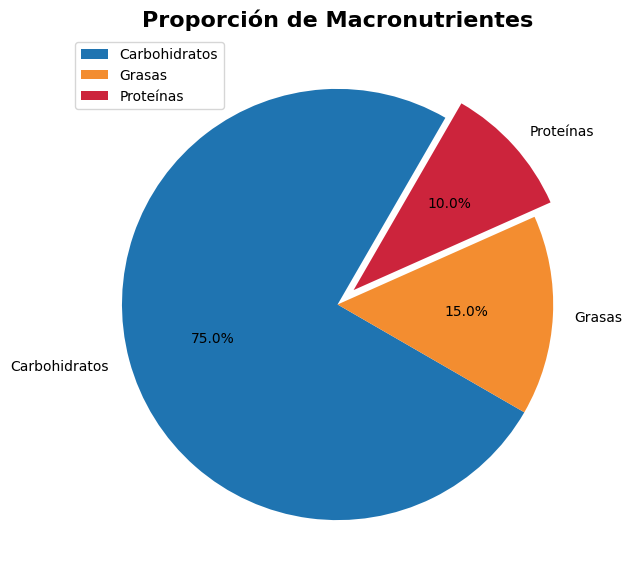

In [4]:
gr.proporcion_macronutrientes()

A continuación el usuario puede ingresar la cantidad de gramos de kilocalorías que necesita, y el programa calcula automáticamente cuántos gramos de proteínas, grasas y carbohidratos debe consumir diario para mantener el balance de nutrientes recomendado.


In [5]:
resultado = fn.calcular_macronutrientes(2600)
for clave, valor in resultado.items(): # para mostrar los resultados de forma mas clara
    print(f"{clave}: {valor} g")


carbohidratos_g: 481.0 g
grasas_g: 43.33 g
proteinas_g: 65.0 g


El siguiente gráfico muestra el costo promedio, en CUP, de obtener 1 gramo de cada macronutriente (proteínas, grasas y carbohidratos) a partir de cada producto analizado.
Para cada producto, la altura de cada segmento de la barra apilada representa el precio promedio por gramo de ese macronutriente.
Por lo tanto, mientras más alta es la barra asociada a un macronutriente en un producto, más costoso resulta obtener 1 gramo de ese macronutriente a partir de dicho producto. En consecuencia, para cubrir las necesidades diarias de macronutrientes, los productos con barras más altas implican un mayor gasto económico.
Además, es posible comparar directamente los precios por gramo de un mismo macronutriente entre diferentes productos: observando todos los segmentos de proteína (del mismo color) en todos los productos, se puede identificar cuál producto ofrece la proteína más barata por gramo. De igual manera, comparando los segmentos de grasas entre todos los productos se identifica cuál es la fuente más económica de grasas, y así sucesivamente con los carbohidratos. Esta comparación es fundamental para optimizar el presupuesto nutricional: si necesitas proteína económica, eliges el producto con el segmento de proteína más bajo; si necesitas carbohidratos baratos, identificas el producto con el segmento de carbohidratos más bajo, y así para cada macronutriente. Si una barra no tiene el color asociado a un macronutrientes significa que ese producto no contiene ese tipo de nutriente.

En este análisis podemos demostrar que los productos más baratos no implica que tenga más grasas, proteina o carbohidrato que otro producto más costoso

Valor promedio de las proteina>> {'muslo de pollo': 5.86, 'pechuga de pollo': 8.28, 'higado de pollo': 5.8, 'picadillo de pollo': 6.68, 'huevo': 17.05, 'molleja de pollo': 5.99, 'lomo de cerdo': 6.39, 'atún': 18.02, 'pierna de cerdo': 5.4, 'solmillo de cerdo': 6.51, 'garbanzos': 5.41, 'frijoles negros': 5.54, 'frijoles colorados': 5.81, 'leche de vaca': 35.7, 'arroz': 12.48, 'codito': 6.1, 'espaguetis': 6.65}
Valor promedio de las grasas>> {'muslo de pollo': 14.65, 'pechuga de pollo': 63.44, 'higado de pollo': 19.71, 'picadillo de pollo': 17.81, 'huevo': 20.47, 'molleja de pollo': 53.91, 'lomo de cerdo': 35.17, 'atún': 22.7, 'pierna de cerdo': 8.29, 'solmillo de cerdo': 68.34, 'garbanzos': 24.8, 'frijoles negros': 121.93, 'frijoles colorados': 130.64, 'leche de vaca': 26.77, 'arroz': 43.69, 'codito': 45.77, 'espaguetis': 43.2}
Valor promedio de las carbohidrato>> {'muslo de pollo': 0, 'pechuga de pollo': 0, 'higado de pollo': 98.56, 'picadillo de pollo': 7.12, 'huevo': 0, 'molleja de p

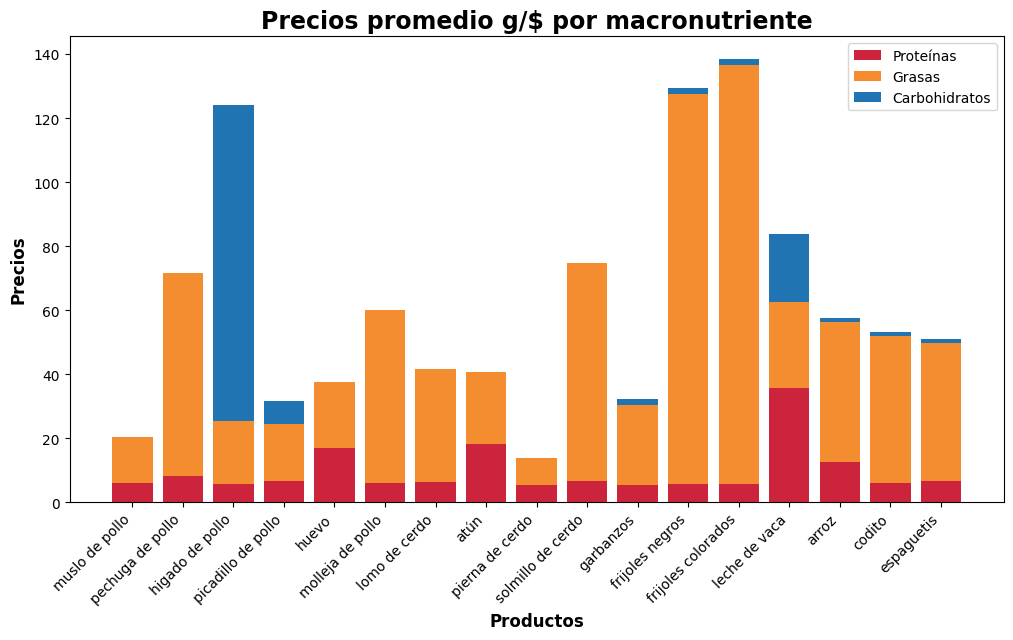

In [ ]:
import matplotlib.pyplot as plt

protein = fn.costo_promedio_nutr(mipyme, productos,proteina)
gras = fn.costo_promedio_nutr(mipyme, productos, grasas)
car = fn.costo_promedio_nutr(mipyme, productos,carbohidratos)

print(f"Valor promedio de las proteina>> {protein}")
print(f"Valor promedio de las grasas>> {gras}")
print(f"Valor promedio de las carbohidrato>> {car}")
print()


#print(f"Producto más económico para obtener grasa: {productos[p.index(min(g))]}")


p = list(protein.values())
g = list(gras.values())
c = list(car.values())


print(f"Producto más económico para obtener proteina: {productos[p.index(min(p))]}")




gr.barra_apilada(productos,c,p,g)
 

La siguiente gráfica enseña cómo ha ido cambiando el precio promedio del arroz, huevo, lomo de cerdo, pierna de cerdo, frijoles negros y frijoles colorados en La Habana mensualmente desde enero de 2024 hasta noviembre de 2025. En el eje horizontal aparecen los meses y en la eje vertical el precio, lo que permite ver con claridad las tendencias en los meses de estos dos años. Esta visualización ayuda a entender cuánto más caro resulta hoy comprar estos alimentos en comparación con el inicio del período y qué significa eso para el bolsillo de las familias habaneras. 

El usario debe escribir en el argumento de la función el producto que desea visualizar




Precio minimo: 555 CUP en la fecha: 2024-01
Precio máximo: 975 CUP en la fecha: 2025-11
Precio promedio: 806 CUP
Representa el 12.40% del salario promedio de un cubano
Variación del precio: 420 CUP. Representa el 75.68% respecto al 2024


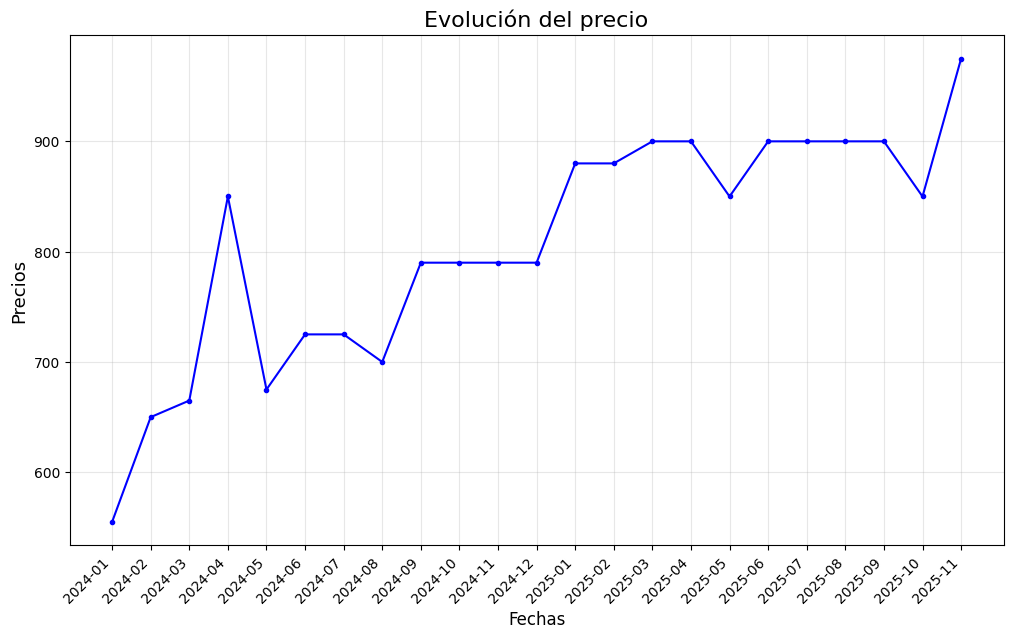

In [14]:
fechas, promedio_precio = fn.datos_evolución_precios(evolución_precios, "lomo de cerdo")

print(f"Precio minimo: {min(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(min(promedio_precio))]}")
print(f"Precio máximo: {max(promedio_precio)} CUP en la fecha: {fechas[promedio_precio.index(max(promedio_precio))]}")
promedio_24meses = round(sum(promedio_precio)/len(promedio_precio))
print(f"Precio promedio: {promedio_24meses} CUP")

print(f"Representa el {(promedio_24meses/6499 * 100):.2f}% del salario promedio de un cubano")
print(f"Variación del precio: {promedio_precio[-1] - promedio_precio[0]} CUP. Representa el {((promedio_precio[-1] - promedio_precio[0])/ promedio_precio[0]*100):.2f}% respecto al 2024") 

gr.evolución_precios(promedio_precio,fechas)

Crear una dieta con los alimentos mas economicos con mayor cantidad de cada uno de los macronutrientes.

In [8]:
protein = fn.costo_promedio_nutr(mipyme, productos,proteina)
gras = fn.costo_promedio_nutr(mipyme, productos, grasas)
car = fn.costo_promedio_nutr(mipyme, productos,carbohidratos)


p = dict(sorted(protein.items(), key=lambda item:item[1]))
g = dict(sorted(gras.items(), key=lambda item:item[1]))
car = dict(sorted(car.items(), key=lambda item:item[1]))

print(car)
print()
print(g)
print()

print(p)

{'muslo de pollo': 0, 'pechuga de pollo': 0, 'huevo': 0, 'molleja de pollo': 0, 'lomo de cerdo': 0, 'atún': 0, 'pierna de cerdo': 0, 'solmillo de cerdo': 0, 'espaguetis': 1.14, 'codito': 1.19, 'arroz': 1.3, 'garbanzos': 1.95, 'frijoles negros': 2.07, 'frijoles colorados': 2.14, 'picadillo de pollo': 7.12, 'leche de vaca': 21.42, 'higado de pollo': 98.56}

{'pierna de cerdo': 8.29, 'muslo de pollo': 14.65, 'picadillo de pollo': 17.81, 'higado de pollo': 19.71, 'huevo': 20.47, 'atún': 22.7, 'garbanzos': 24.8, 'leche de vaca': 26.77, 'lomo de cerdo': 35.17, 'espaguetis': 43.2, 'arroz': 43.69, 'codito': 45.77, 'molleja de pollo': 53.91, 'pechuga de pollo': 63.44, 'solmillo de cerdo': 68.34, 'frijoles negros': 121.93, 'frijoles colorados': 130.64}

{'pierna de cerdo': 5.4, 'garbanzos': 5.41, 'frijoles negros': 5.54, 'higado de pollo': 5.8, 'frijoles colorados': 5.81, 'muslo de pollo': 5.86, 'molleja de pollo': 5.99, 'codito': 6.1, 'lomo de cerdo': 6.39, 'solmillo de cerdo': 6.51, 'espagueti

A partir del valor anterior ( precio por gramo de cada macronutrinte) Crear un codigo para saber cuales son las mejores combinaciones de alimentos para cubrir las necesidades del usuario anteriormente

-Datos sobre los precios de otras fuentes de alimento de carbohidratos y compararlos con las fuentes de proteina. La idea es mostrar que con el aumento de los precios de las proteinas, el cubano sobrepasa el consumo de carbohidratos y a la misma vez aumentan las muertes y los casos de enfermedades cardiovasculares y diabetes. (Datos en la ONEI Y el anuario estadistico de salud)
